# Capstone 2

Step 1 of the DSM was already completed, so we'll begin with step 2 of DSM.



**The Data Science Method**  


1.   Problem Identification 

2.   **Data Wrangling** 
  * Data Collection
      - Locating the data
      - Data loading
      - Data joining
   * Data Organization
      -  File structure
      -  Git & Github
  * Data Definition
      - Column names
      - Data types (numeric, categorical, timestamp, etc.)
      - Description of the columns
      - Count or percent per unique values or codes (including NA)
      - The range of values or codes  
  * Data Cleaning
      - NA or missing data
      - Duplicates
 
3.   Exploratory Data Analysis 

4.   Pre-processing and Training Data Development

5.   Modeling 

6.   Documentation





## Data Collection

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#check current working directory
os.getcwd()

'C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two'

In [69]:
#need to change working directory to data, where the data are saved
path="C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\data"
os.chdir(path)

In [4]:
#check and see what files are in data folder
os.listdir()

['Apr2016.xlsx',
 'Aug2016.xlsx',
 'Dec2016.xlsx',
 'Feb2016.xlsx',
 'Jan2016.xlsx',
 'Jul2016.xlsx',
 'Jun2016.xlsx',
 'Mar2016.xlsx',
 'May2016.xlsx',
 'Nov2016.xlsx',
 'OceanHourlySales2017.xlsx',
 'Oct2016.xlsx',
 'processed',
 'Sep2016.xlsx']

<font color='teal'> **I've decided to use the 2017 excel file that has 14sheets, we'll take months Jan~Dec which each sheets are named by the first three letter of the month, with first letter being capitalized**</font>

In [81]:
#read the excel into xls
xls = pd.ExcelFile('OceanHourlySales2017.xlsx')

#read one sheet and see its columns and contents
df = pd.read_excel(xls, 'Jan')
print(df.columns)
df.head()

Index(['Unnamed: 0', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'AVG'],
      dtype='object')


,Unnamed: 0,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,AVG
0,Time,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,NaN
1,11:00:00,37.92,14.67,19.06,51.73,30.9,40.81,27,31.7271
2,12:00:00,65.91,50.36,36.95,43.55,71.16,84.45,46.19,56.9386
3,13:00:00,118.71,23.7,51.32,79.56,81.48,103.67,68.19,75.2329
4,14:00:00,91.52,46.23,102.62,85.5,80.79,175.13,66.34,92.59


## Data Definition

In [74]:
#drop the AVG column, since we're interested in each weekday's hourly sales
df.drop(df.columns[-1], axis=1, inplace=True)

#Rename the unnamed column to Time
df.columns.values[0] = 'Time'
df.head()

,Time,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Time,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00
1,11:00:00,37.92,14.67,19.06,51.73,30.9,40.81,27
2,12:00:00,65.91,50.36,36.95,43.55,71.16,84.45,46.19
3,13:00:00,118.71,23.7,51.32,79.56,81.48,103.67,68.19
4,14:00:00,91.52,46.23,102.62,85.5,80.79,175.13,66.34


In [7]:
#let's check the rows' indexs by using the Time column and value counts
df['Time'].value_counts()

14:00:00    5
20:00:00    5
AM          5
15:00:00    5
PM          5
22:00:00    5
11:00:00    5
18:00:00    5
Time        5
16:00:00    5
13:00:00    5
23:00:00    5
Total       5
21:00:00    5
12:00:00    5
17:00:00    5
19:00:00    5
Name: Time, dtype: int64

In [80]:
#since we're only interested in the hourly sales not the daily total/AM sales/PM sales we'll remove those rows
#Since the columns already indicate Mon~Sunday, we can also remove the Time rows
df = df[~df['Time'].isin(['Time', 'AM', 'PM', 'Total'])]

#let's check the rows' indexs again
df['Time'].value_counts()

14:00:00    5
16:00:00    5
17:00:00    5
12:00:00    5
21:00:00    5
23:00:00    5
13:00:00    5
20:00:00    5
18:00:00    5
11:00:00    5
22:00:00    5
15:00:00    5
19:00:00    5
Name: Time, dtype: int64

In [9]:
#now we have all the columns and rows we want to work with, let's use df.info() to see check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 1 to 89
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       65 non-null     object
 1   Monday     63 non-null     object
 2   Tuesday    63 non-null     object
 3   Wednesday  63 non-null     object
 4   Thursday   63 non-null     object
 5   Friday     62 non-null     object
 6   Saturday   68 non-null     object
 7   Sunday     63 non-null     object
dtypes: object(8)
memory usage: 5.1+ KB


In [10]:
#change the Dtype in Mon~Sunday to float
#create a list of columns that needs to change (all columns except 'Time')
cols = df.columns.drop('Time')
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

#check df info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 1 to 89
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       65 non-null     object 
 1   Monday     60 non-null     float64
 2   Tuesday    60 non-null     float64
 3   Wednesday  60 non-null     float64
 4   Thursday   60 non-null     float64
 5   Friday     59 non-null     float64
 6   Saturday   65 non-null     float64
 7   Sunday     60 non-null     float64
dtypes: float64(7), object(1)
memory usage: 5.1+ KB


In [11]:
#let's find out the min/max value to make sure there's no mistake with the inputs
print(df.max())
print(df.min())

Monday       164.93
Tuesday      149.51
Wednesday    153.74
Thursday     215.22
Friday       192.54
Saturday     215.32
Sunday       232.75
dtype: float64
Monday       16.73
Tuesday      10.06
Wednesday    17.63
Thursday     20.78
Friday        4.00
Saturday     21.80
Sunday        9.27
dtype: float64


The min values seems to be a bit too low, I'm guessing the staff member opened earlier or later than usualy for customer(s) who arrived before store's opening hour or last minute customer coming in after store operation hour. And even though there are missing values, we will leave it as it is, since we are going to create a table with hourly sales' average based by hour and day of the week. Removing the rows with missing value will result in less accurate data, and we can't replace missing values with 0, since that hour's sales is unlikely to be zero unless it's closed. We ill fill in the missing value after the mean table is created.

## Data Cleaning

In [12]:
#since there's no unusual numbers, we'll keep the NaN as it is, since we're be getting the mean average sales
#by hour for each day of the week.
#let's use groupby Time to get all the same weekday and hour's average by chaining .mean() and store it as df_mean
df_mean = df.groupby(['Time']).mean()
df_mean

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
11:00:00,51.0125,43.9275,43.0675,46.6450,58.897500,69.2175,45.7725
12:00:00,61.7725,52.8375,53.4150,68.3725,90.837500,117.2875,64.3450
13:00:00,99.3025,43.1500,66.6150,70.6350,87.077500,123.0050,98.4400
14:00:00,93.5975,57.9425,70.5075,97.6700,98.107500,148.6350,137.3150
15:00:00,128.7350,58.0325,111.5400,113.5825,143.865000,142.8200,141.0775
16:00:00,135.7900,115.5425,111.9475,148.9000,162.417500,135.9500,131.6250
17:00:00,75.3675,72.9950,63.8450,88.4600,91.620000,113.5850,107.5275
18:00:00,80.1100,80.9775,40.5100,53.2675,81.306667,99.8500,91.6450
19:00:00,66.6625,53.9400,63.6825,59.3475,106.666667,81.8850,83.9400


In [13]:
#These NaN are when the store is closed so we'll make it 0
df_mean.fillna(0, inplace=True)

In [93]:
#let's define a function that takes in a dataframe and a string for file name and does all the steps I did
#and save the dataframe to csv in the processed folder
def data_cleaning(data):
    #drop the AVG column, since we're interested in each weekday's hourly sales
    data.drop(data.columns[8], axis=1, inplace=True)

    #Rename the unnamed column to Time
    data.columns.values[0] = 'Time'
    
    #since we're only interested in the hourly sales not the daily total/AM sales/PM sales we'll remove those rows
    #Since the columns already indicate Mon~Sunday, we can also remove the Time rows
    data = data[~data['Time'].isin(['Time', 'AM', 'PM', 'Total'])]
    
    #change the Dtype in Mon~Sunday to float
    #create a list of columns that needs to change
    cols = data.columns.drop('Time')
    data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
    
    #we need to check for unusual values, e.g. hourly sales over 500, it's likely a mistake or negative number
    assert any(data.max(numeric_only=True) < 500), 'One or more input was over 500!'
    assert any(data.min(numeric_only=True) > 0), 'One or more input was negative!'
    
    #let's use groupby Time to get all the same weekday and hour's average by chaining .mean() and store it as df_mean
    data_mean = data.groupby(['Time']).mean()
    
    #The NaN are when the store is closed so we'll make it 0
    data_mean.fillna(0, inplace=True)
    
    return data_mean

In [84]:
#read the rest of the sheets into dataframes
#make sure we're in the right directory
path="C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\data\\"
os.chdir(path)

#make a month list to iterate
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#dict comprehension
dict_list = {month:pd.read_excel(xls, month) for month in month_list}

#call by dict_list['month']

In [91]:
#use the created function to clean these dataframes, and saving the cleaned dataframe with appropriate names
#dict comprehension
#string.format() or add string

#use a dict comprehension to store cleaned dataframes
clean_dfs = {month:data_cleaning(dict_list[month]) for month in month_list}

#call clean_dfs['month'] for the dataframe of the cleaned df of that month

C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [100]:
#let's check the sum of mean for each month to find out which ones should belong to same
#do so by iterating month thru month_list
for month in month_list:
    data = clean_dfs[month]
    month_sum = round(sum(data.sum(axis=1)), 0)
    print(month + ': ' + str(month_sum))

Jan: 7335.0
Feb: 7751.0
Mar: 8974.0
Apr: 9152.0
May: 9203.0
Jun: 8222.0
Jul: 8698.0
Aug: 9499.0
Sep: 10542.0
Oct: 9856.0
Nov: 7850.0
Dec: 7759.0


Since from November to February the sales are below 8000 dollars, we should consider these months as slow season.
From March to October the sales were around 9000 to 10000 dollars per month with exception of June and July; it's mostlikely due to Summer vacation, we'll consider those months to be peak season, and June and July to be Summer season.
Let's comebine the mentioned months to do additional analysis and decide the store's recommended open hours

In [101]:
#combine the mean df for Nov~Feb into one big df and then average out the values by hour/day of the week and see
#create slow months in a list to iterate
slow_months = ['Nov', 'Dec', 'Jan', 'Feb']

slow_mean = pd.concat([clean_dfs[month] for month in slow_months])
slow_mean = slow_mean.groupby(['Time']).mean()

#let's create a condition and apply to df_mean for hourly average sales to decide working staff numbers
#not recommended to open if makes less than $40 in an hour
cond = (slow_mean < 40)
slow_staff = slow_mean.where(~cond, 0)

#if store is open, 2 staff members are fine if houly sales is less than 150
cond = (slow_staff > 40) & (150 > slow_staff)
slow_staff = slow_staff.where(~cond, 2)
    
#if more than 150, we should use 3 staffs, but that's maximum staff member capacity, since it's a small store
cond = (slow_staff > 150)
slow_staff = slow_staff.where(~cond, 3)

#it's hard to read a bunch of numbers to tell the difference, so we'll change
#0 to CLOSE, 2 as open, 3 as PEAK

slow_staff.replace([0, 2, 3], ['CLOSE', 'open', 'PEAK'], inplace=True)
slow_staff

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
11:00:00,open,open,open,open,open,open,open
12:00:00,open,open,open,open,open,open,open
13:00:00,open,open,open,open,open,open,open
14:00:00,open,open,open,open,open,PEAK,open
15:00:00,open,open,open,open,open,PEAK,open
16:00:00,open,open,open,open,open,open,open
17:00:00,open,open,open,open,open,open,open
18:00:00,open,open,open,open,open,open,open
19:00:00,open,open,open,open,open,open,open


For the SLOW Season, which is from November to February, the recommended store hours are

Monday - 11:00AM to 10:00PM

Tuesday to Sunday - 11:00AM to 11:00PM

All open hours with 2 staff members as minimum requirement, except for Saturdays there should be a 3rd staff from 1pm to 4pm.

In [102]:
#let's do the same for months with sum over $8900
#combine the mean df for Mar~May and Aug~Oct into one big df and then average out the values by hour/day of the week and see

peak_months = ['Mar', 'Apr', 'May', 'Aug', 'Sep', 'Oct']
peak_mean = pd.concat([clean_dfs[month] for month in peak_months])
peak_mean = peak_mean.groupby(['Time']).mean()

#not recommended to open if makes less than $40 in an hour
cond = (peak_mean < 40)
peak_staff = peak_mean.where(~cond, 0)

#if store is open, 2 staff members are fine if houly sales is less than 150
cond = (peak_staff > 40) & (150 > peak_staff)
peak_staff = peak_staff.where(~cond, 2)
    
#if more than 150, we should use 3 staffs, but that's maximum staff member capacity, since it's a small store
cond = (peak_staff > 150)
peak_staff = peak_staff.where(~cond, 3)

#it's hard to read a bunch of numbers to tell the difference, so we'll change
#0 to CLOSE, 2 as open, 3 as PEAK

peak_staff.replace([0, 2, 3], ['CLOSE', 'open', 'PEAK'], inplace=True)
peak_staff

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
11:00:00,open,open,open,open,open,open,open
12:00:00,open,open,open,open,open,open,open
13:00:00,open,open,open,open,open,open,PEAK
14:00:00,open,open,open,open,open,PEAK,PEAK
15:00:00,open,PEAK,PEAK,open,PEAK,PEAK,PEAK
16:00:00,open,PEAK,PEAK,PEAK,PEAK,PEAK,PEAK
17:00:00,open,open,open,open,open,open,open
18:00:00,open,open,open,open,open,open,open
19:00:00,open,open,open,open,open,open,open


The recommended store hours for PEAK season, which is from March to October, except June and July:

Sunday to Thursday - 11AM ~ 11PM

Friday&Saturday - 11AM ~ Midnight

All open hours should have 2 staffs, with the following exceptions:

Tuesday, Wednesday and Friday should have a 3rd staff from 2pm to 6pm, since the minimum shift is four hours, this staff member will come one hour prior for the other two staff to get a chance to take their lunch break before the rush hour.

Saturday and Sunday should have a 3rd shift from 1PM to 5PM.

In [104]:
#let's do the same for June and July but with 2 different dfs to see if it's necessary to make these 2 months into a season
#not recommended to open if makes less than $40 in an hour
June_mean = clean_dfs['Jun'].groupby(['Time']).mean()

cond = (June_mean < 40)
Jun_staff = June_mean.where(~cond, 0)

#if store is open, 2 staff members are fine if houly sales is less than 150
cond = (Jun_staff > 40) & (150 > Jun_staff)
Jun_staff = Jun_staff.where(~cond, 2)
    
#if more than 150, we should use 3 staffs, but that's maximum staff member capacity, since it's a small store
cond = (Jun_staff > 150)
Jun_staff = Jun_staff.where(~cond, 3)

#it's hard to read a bunch of numbers to tell the difference, so we'll change
#0 to CLOSE, 2 as open, 3 as PEAK

Jun_staff.replace([0, 2, 3], ['CLOSE', 'open', 'PEAK'], inplace=True)
Jun_staff

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
11:00:00,open,open,CLOSE,open,open,open,CLOSE
12:00:00,open,open,open,open,open,open,open
13:00:00,open,open,open,open,open,open,open
14:00:00,open,open,open,open,open,open,open
15:00:00,open,open,open,open,open,PEAK,PEAK
16:00:00,PEAK,open,open,open,open,PEAK,PEAK
17:00:00,open,open,open,open,open,open,open
18:00:00,open,open,open,open,open,open,open
19:00:00,open,open,open,open,open,open,open


In [105]:
#let's do the same for July
#not recommended to open if makes less than $40 in an hour
July_mean = clean_dfs['Jul'].groupby(['Time']).mean()

cond = (July_mean < 40)
Jul_staff = July_mean.where(~cond, 0)

#if store is open, 2 staff members are fine if houly sales is less than 150
cond = (Jul_staff > 40) & (150 > Jul_staff)
Jul_staff = Jul_staff.where(~cond, 2)
    
#if more than 150, we should use 3 staffs, but that's maximum staff member capacity, since it's a small store
cond = (Jul_staff > 150)
Jul_staff = Jul_staff.where(~cond, 3)

#it's hard to read a bunch of numbers to tell the difference, so we'll change
#0 to CLOSE, 2 as open, 3 as PEAK

Jul_staff.replace([0, 2, 3], ['CLOSE', 'open', 'PEAK'], inplace=True)
Jul_staff

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
11:00:00,open,open,open,open,open,open,open
12:00:00,open,open,open,open,open,open,open
13:00:00,open,open,open,open,open,open,open
14:00:00,open,PEAK,open,open,open,PEAK,PEAK
15:00:00,open,open,open,open,open,PEAK,PEAK
16:00:00,open,open,open,open,open,open,open
17:00:00,open,open,open,open,open,PEAK,open
18:00:00,open,open,open,open,open,open,open
19:00:00,open,open,open,open,open,open,open


June and July don't have more than 1 hour of BUSY hour except Saturday and Sunday, so the recommended store hours will be

Sunday ~ Thursday - 11AM ~ 11PM

Friday & Saturday - 11AM ~ Midnight

All open hours should have 2 staff members except Saturday&Sunday, a 3rd staff should be there from 1PM~5PM.

## Exploratory Data Analysis

In [106]:
#let's make line graphs for the mentioned seasons for visualization
#slow_mean, peak_mean are the tables we needed but we still haven't make one for June+July, so we'll make it
summer_mean = pd.concat([clean_dfs[month] for month in ['Jun', 'Jul']])
summer_mean = summer_mean.groupby(['Time']).mean()

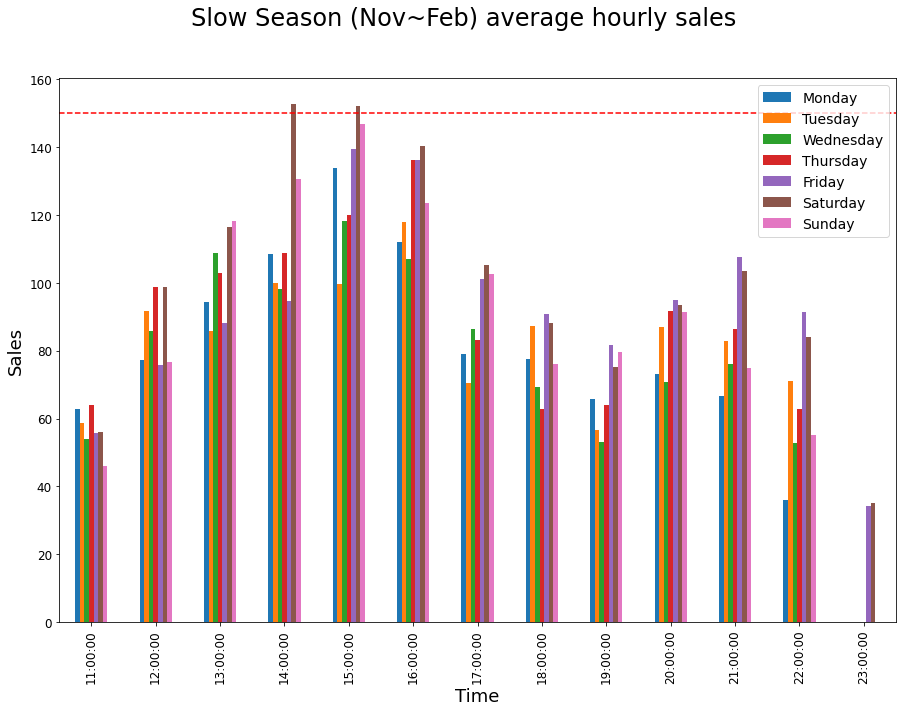

In [107]:
#let's make bar graphs with x being hours of the day, y being sales
#begin with the slow season
#defining plot type, sizes
ax = slow_mean.plot(kind='bar', figsize=(15, 10), fontsize=12)

#draw a horizontal line at y=150 indicating bars that reach this is recommended to have 3 staffs at the time
ax.axhline(y=150, color='r', linestyle='--')

#title, labels, and legend size
plt.suptitle('Slow Season (Nov~Feb) average hourly sales', fontsize=24)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.legend(fontsize=14)

#save to figure folder
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\Slow Season Bar.png')

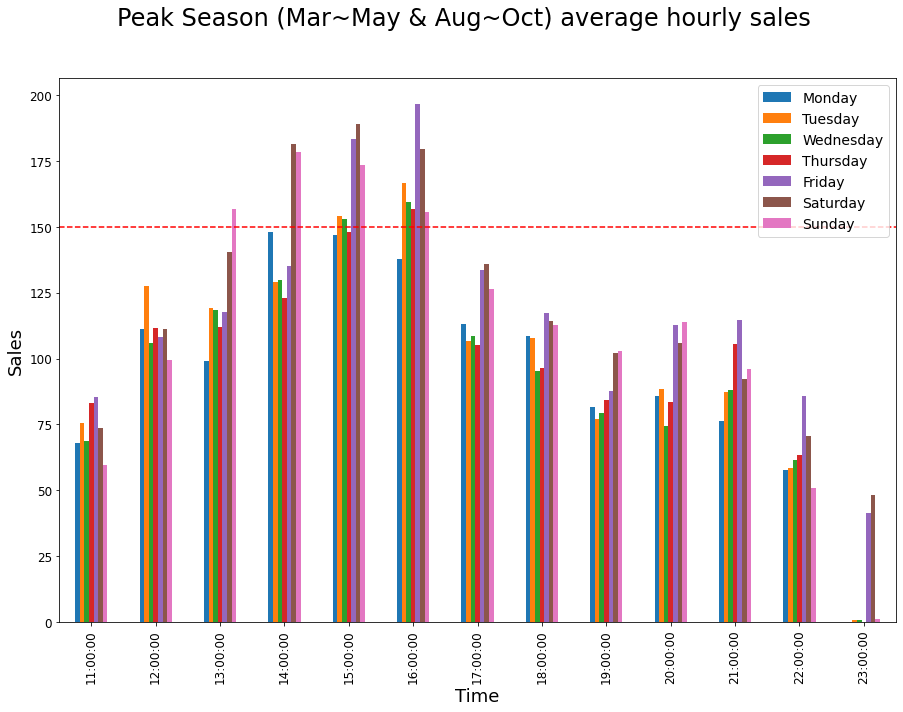

In [108]:
#peak season
#defining plot type, sizes
ax = peak_mean.plot(kind='bar', figsize=(15, 10), fontsize=12)

#draw a horizontal line at y=150 indicating bars that reach this is recommended to have 3 staffs at the time
ax.axhline(y=150, color='r', linestyle='--')

#title, labels, and legend size
plt.suptitle('Peak Season (Mar~May & Aug~Oct) average hourly sales', fontsize=24)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.legend(fontsize=14)

#save to figure folder
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\Peak Season Bar.png')

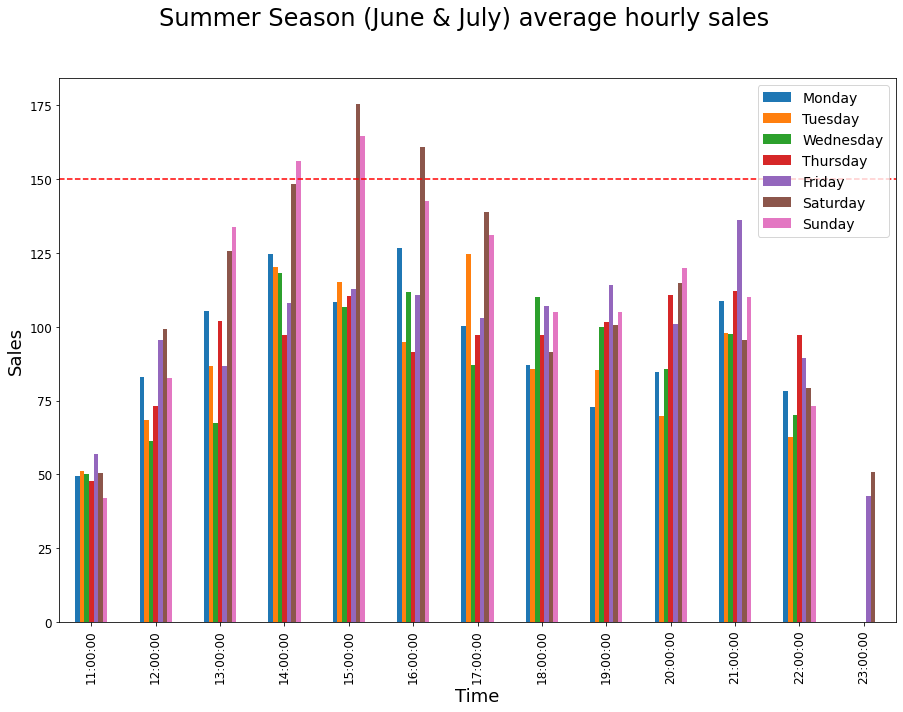

In [109]:
#summer season
#defining plot type, sizes
ax = summer_mean.plot(kind='bar', figsize=(15, 10), fontsize=12)

#draw a horizontal line at y=150 indicating bars that reach this is recommended to have 3 staffs at the time
ax.axhline(y=150, color='r', linestyle='--')

#title, labels, and legend size
plt.suptitle('Summer Season (June & July) average hourly sales', fontsize=24)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.legend(fontsize=14)

#save to figure folder
plt.savefig('C:\\Users\\tc18f\\Desktop\\springboard\\Capstone Two\\figures\\Summer Season Bar.png')